In [1]:
# Frequência, número de incidentes de determinado evento ou ciclo, medimos a frequência por um determinado tempo
# por um certo periodo T, onde a frequência é o inverso do periodo

# Ressonância, força que faz com que ocile, medido por sua amplitude

# Harmônica sequencias específicas de uma frequência que podem ser causadas por uma ressonância

# O Espectro Sonoro é o conjunto de frequências de vibração que podem ser produzidas pelas diversas fontes sonoras

In [2]:
import IPython.display as ipd

# aquisição
test_audio = 'data/kenzo/kenzo_5.ogg'
ipd.Audio(test_audio)

In [3]:
import librosa
data, sampling_rate = librosa.load(test_audio)
# data - array de audios
# sampling_rate - taxa de amostragem do arquivo extraído, 
#                 número de amostras de áudio transmitidas por segundo, medido em Hz ou kHz.

In [4]:
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(5, 2))
plt.title('Kenzo')
librosa.display.waveplot(data, sr=sampling_rate)
# gera a vizualização da amplitude de onda

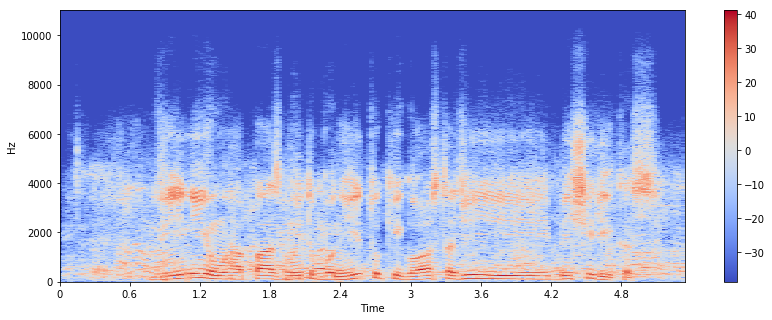

In [5]:
# Short-time Fourier transform
X = librosa.stft(data)
# converte um espectrograma de amplitude em espectrograma em escala de dB
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
# representação visual do espectro de freqüências de som ou outros sinais
# A média estatística de um determinado sinal ou tipo de sinal (incluindo ruído ), 
# Espectro sonoro é o conjunto de todas as ondas que compõem os sons audíveis e não audíveis pelo ser humano.
# conforme analisado em termos de seu conteúdo de freqüência, é chamada de espectro .

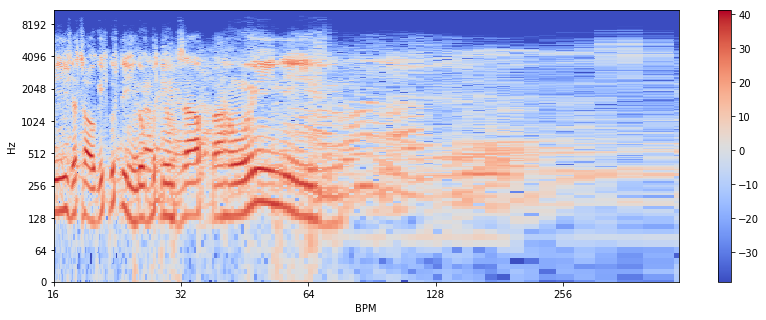

In [6]:
# converte o eixo de freqüência em um logarítmico.

# Enquanto uma função no domínio do tempo indica como a amplitude
# do sinal muda no tempo, sua representaçõo no domínio da frequência permite
# saber quantas vezes essas mudanças ocorrem.

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis = 'tempo', y_axis = 'log') 
plt.colorbar()

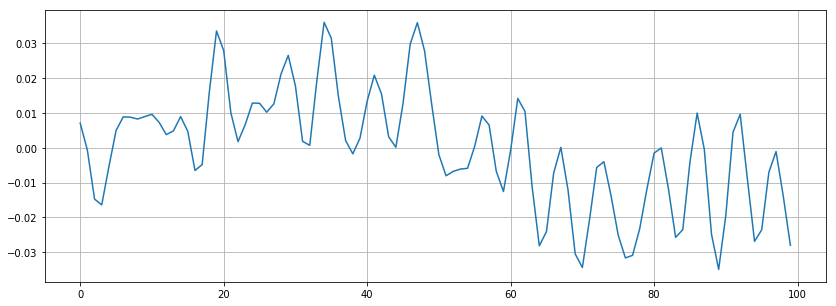

In [7]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

In [8]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

17


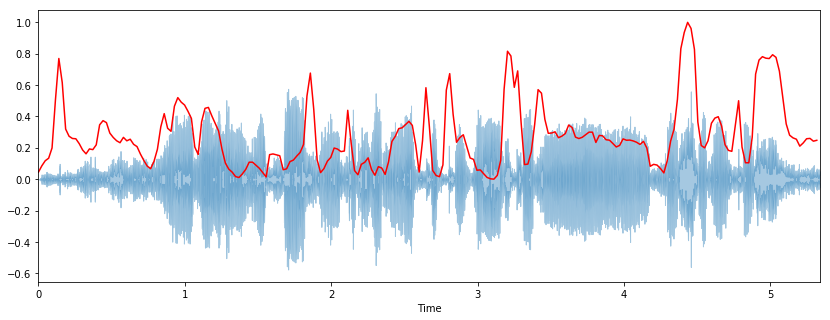

In [9]:
import sklearn

# Spectral Centroid
#
# Indica onde o “centro de massa” de um som está localizado e é 
# calculado como a média ponderada das freqüências presentes no som. 
# Considere duas músicas, uma de um gênero de blues e outra de metal. 
# Agora, em comparação com a música do gênero blues, que é a mesma 
# em toda a sua extensão, a música de metal tem mais freqüências no final. 
# Então, o centróide espectral para a música blues estará em algum lugar 
# perto do meio do seu espectro, enquanto que para uma música de metal estaria no fim.

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

#
# não rola
#

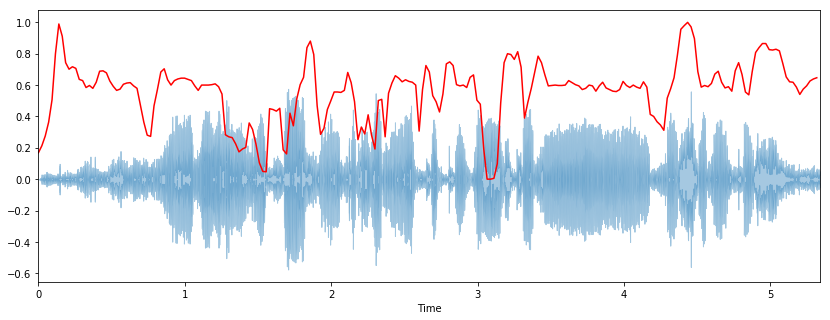

In [10]:
# Rolloff espectral
#
# É uma medida da forma do sinal. Representa a frequência abaixo 
# da qual está uma porcentagem especificada da energia espectral total
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

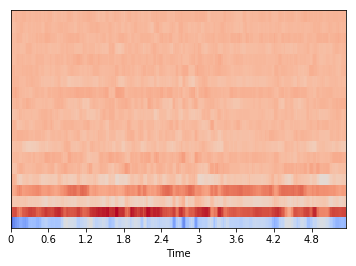

In [11]:
# Mel-Frequency Cepstral Coefficients
#
# Os coeficientes cepstrais da frequência Mel (MFCCs) de um sinal 
# são um pequeno conjunto de características (geralmente cerca de 10–20) 
# que descrevem de forma concisa a forma geral de um envelope espectral. 
# Modela as características da voz humana.

mfccs = librosa.feature.mfcc(data, sr=sampling_rate)

#MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

[ 1.30330529e-15  1.73774039e-16 -1.18087907e-15  6.20759482e-16
 -3.47427401e-16 -2.31698718e-17  5.93727965e-17  2.69349760e-16
 -2.56799413e-16 -1.91875501e-16  6.46825588e-17 -3.36928553e-16
  2.64522703e-16 -3.57202191e-17 -1.47949286e-16 -7.18024674e-17
  5.54146101e-16 -4.53743323e-17 -2.32664130e-16  1.78601095e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


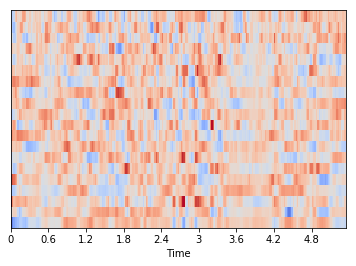

In [12]:
# ?????????

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

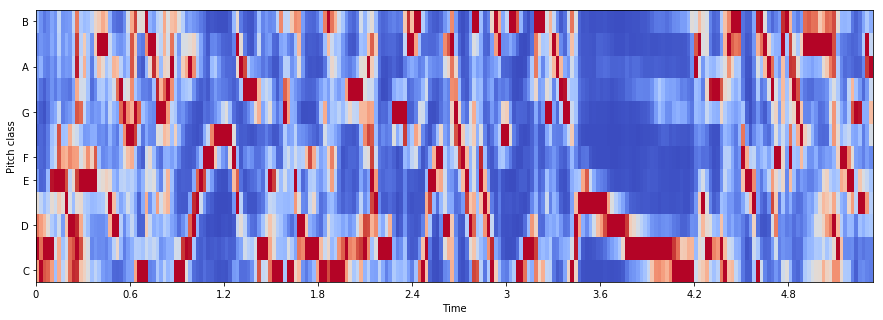

In [13]:
# 

hop_length = 512
chromagram = librosa.feature.chroma_stft(data, sr=sampling_rate, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [14]:
import os

classes = []

# buscando os nomes de todas as classes
for name in os.listdir("data"):
    if name != 'audio_model':
        classes.append(name)
        os.remove(f'csv/data_{name}.csv')

# definindo os dados que serão analisados
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [15]:
print(classes)

['kenzo']


In [16]:
import numpy as np
import csv

for person in classes:
    data_file = f'csv/data_{person}.csv'
    file = open(data_file, 'a', newline='')

    # criando csv para inserção de dados
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
        
    # dados do usuario
    for filename in os.listdir(f'data/{person}'):
        songname = f'data/{person}/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # {np.mean(rmse)}
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {person}'
        file = open(data_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            
    # adiciona dados de treino aleatorios para treinar o modelo
    for filename in os.listdir('data/audio_model'):
        songname = f'data/audio_model/{filename}'
        print(songname)
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        # {np.mean(rmse)}
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += ' audio_model'
        file = open(data_file, 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


data/kenzo/kenzo_1.ogg
data/kenzo/kenzo_2.ogg
data/kenzo/kenzo_3.ogg
data/kenzo/kenzo_4.ogg
data/kenzo/kenzo_5.ogg
data/audio_model/audio_model_1.ogg
data/audio_model/audio_model_2.ogg
data/audio_model/audio_model_3.ogg
data/audio_model/audio_model_4.ogg
data/audio_model/audio_model_5.ogg


In [17]:
datas = []

print(classes)

for person in classes:
    data_file=f'csv/data_{person}.csv'
    data=pd.read_csv(data_file)
    data=data.reindex(np.random.permutation(data.index))
    datas.append(data)    
    
datas[0].head(30)

['kenzo']


,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,kenzo_1.ogg,0.414287,1684.533436,1651.346053,3157.522771,0.100331,-465.704100,114.932718,-12.369236,17.533184,...,-6.333129,-0.667344,-3.181014,-2.832403,-4.545513,-3.323363,-1.801362,-3.953033,-0.653561,kenzo
9,audio_model_5.ogg,0.208881,1410.527414,1536.097156,2702.299964,0.062712,-345.128976,123.609970,-19.893582,23.716351,...,-12.342787,-11.544513,-7.808680,1.189393,2.031121,10.641271,12.371614,10.959433,6.801921,audio_model
7,audio_model_3.ogg,0.337822,1642.704587,1621.428939,3198.731064,0.071995,-379.478835,109.405760,-19.443095,28.319231,...,-2.737981,-7.978823,-1.880292,-5.514852,-8.438549,-4.495092,-5.995173,-4.759895,-6.920408,audio_model
5,audio_model_1.ogg,0.327557,1433.488230,1521.139917,2768.607122,0.077376,-329.973981,146.095272,-17.501039,45.368804,...,-5.163545,-3.085542,1.720315,-3.309031,-7.250034,0.821573,-4.904636,-0.989260,-6.836678,audio_model
4,kenzo_5.ogg,0.333995,1759.294877,1539.568737,3515.061354,0.099875,-186.354581,144.178877,-48.065225,67.039073,...,-8.845574,3.986083,-16.085222,-4.566868,-3.012439,-10.396401,-0.704362,-5.914383,-2.494718,kenzo
2,kenzo_3.ogg,0.460332,1777.954926,1760.735186,3445.887416,0.103414,-469.626657,115.015319,-8.021031,19.763533,...,-3.667183,-0.234735,-2.926210,-1.705883,-1.012226,-2.506706,-2.150383,-4.127589,-0.658571,kenzo
1,kenzo_2.ogg,0.432552,1548.390249,1587.464164,3055.210983,0.087068,-446.147582,129.624667,-23.964157,20.083148,...,-2.213462,2.446100,-3.487390,1.199024,-4.004175,-6.613223,-3.613651,-6.336938,-1.944789,kenzo
8,audio_model_4.ogg,0.375767,1677.588614,1578.499981,3396.153773,0.101791,-411.831506,109.181069,-5.202723,63.947246,...,0.714344,1.904916,-14.275556,3.924950,1.897285,-4.321095,-2.405358,-7.487377,-1.490098,audio_model
3,kenzo_4.ogg,0.419654,1572.511734,1581.591028,3048.328576,0.088765,-446.891782,130.911874,-19.405535,13.926291,...,-7.350302,2.134655,-2.546449,-0.907345,-2.800424,-0.328603,-1.538962,-8.490110,-5.295434,kenzo
6,audio_model_2.ogg,0.343563,1748.102910,1598.618272,3176.541361,0.091961,-376.759865,110.450077,-24.674732,32.120481,...,-7.799501,-4.224613,1.867320,-7.734318,-8.961747,-2.305250,-10.141938,-7.038889,-2.895510,audio_model


In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

model_train = {}

class ModelTrain(object):
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

for person in classes:
    genre_list = data.iloc[:, -1]
    encoder = LabelEncoder()
    y = encoder.fit_transform(genre_list)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = ModelTrain(X_train, X_test, y_train, y_test)
    model_train[person] = model


In [19]:
for person in classes:
    print(model_train[person].__dict__)

{'X_train': array([[-0.40236587,  0.13833391,  0.35935237,  0.20518149, -1.25211288,
         0.07760366, -1.05345147,  0.03671724, -0.26674428,  0.01475495,
        -0.21088881, -0.34738455,  0.23473819, -0.17832361,  0.37484552,
         0.72689283,  0.79301386, -1.31795607,  0.51518996, -1.04718089,
        -1.30869282, -0.42169481, -0.71105222, -0.17759879, -1.24992501],
       [ 0.97770617, -0.62043057, -0.1539077 , -0.35790769, -0.1105844 ,
        -0.74219959,  0.47506973, -0.36723651, -0.71855431,  0.65408609,
         1.56883355,  1.29140888,  0.04897158,  1.06630044, -0.21033586,
        -0.52955828,  0.93968564,  0.87952003,  0.23735317,  0.96783867,
        -0.1069162 , -0.82542086, -0.27760093, -0.47363922,  0.07849262],
       [-0.45812002,  1.07630975, -0.87768139,  1.44627724,  0.85922358,
         2.45238788,  1.57534769, -2.52065052,  1.85732537, -2.39069132,
         0.12119647,  0.63909491, -2.03402585, -0.15498797, -0.39940782,
        -0.71506769, -0.9148577 ,  1.

In [20]:
from keras import backend as K

def recall_m(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [21]:
from keras import models, layers

model = {}

for person in classes:
    model[person] = models.Sequential()

    model[person].add(layers.Dense(128, activation='relu', input_shape=(model_train[person].X_train.shape[1],)))

    model[person].add(layers.Dense(64, activation='relu'))

    model[person].add(layers.Dense(32, activation='relu'))

    model[person].add(layers.Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
from keras import backend as K
    
for person in classes:
    model[person].compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
                          metrics=['accuracy', f1_m])

In [23]:
for person in classes:
    model[person].summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 13,730
Trainable params: 13,730
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = {}
results = []

for person in classes:    
    history[person] = model[person].fit(model_train[person].X_train,
                    model_train[person].y_train,
                    validation_data=[model_train[person].X_test, model_train[person].y_test],
                    batch_size=128,
                    epochs=15,
                    verbose=1)
    
    results = model[person].evaluate(model_train[person].X_test, model_train[person].y_test)

Instructions for updating:
Use tf.cast instead.
Train on 8 samples, validate on 2 samples
Epoch 1/15
8/8 [==============================] - 1s 75ms/step - loss: 0.6487 - acc: 0.6250 - f1_m: 0.6667 - val_loss: 0.5958 - val_acc: 1.0000 - val_f1_m: 0.6667
Epoch 2/15
8/8 [==============================] - 0s 623us/step - loss: 0.5608 - acc: 0.8750 - f1_m: 0.6667 - val_loss: 0.5695 - val_acc: 1.0000 - val_f1_m: 0.6667
Epoch 3/15
8/8 [==============================] - 0s 374us/step - loss: 0.4893 - acc: 0.8750 - f1_m: 0.6667 - val_loss: 0.5441 - val_acc: 1.0000 - val_f1_m: 0.6667
Epoch 4/15
8/8 [==============================] - 0s 1ms/step - loss: 0.4299 - acc: 1.0000 - f1_m: 0.6667 - val_loss: 0.5246 - val_acc: 1.0000 - val_f1_m: 0.6667
Epoch 5/15
8/8 [==============================] - 0s 374us/step - loss: 0.3829 - acc: 1.0000 - f1_m: 0.6667 - val_loss: 0.5060 - val_acc: 1.0000 - val_f1_m: 0.6667
Epoch 6/15
8/8 [==============================] - 0s 499us/step - loss: 0.3412 - acc: 1.0000 

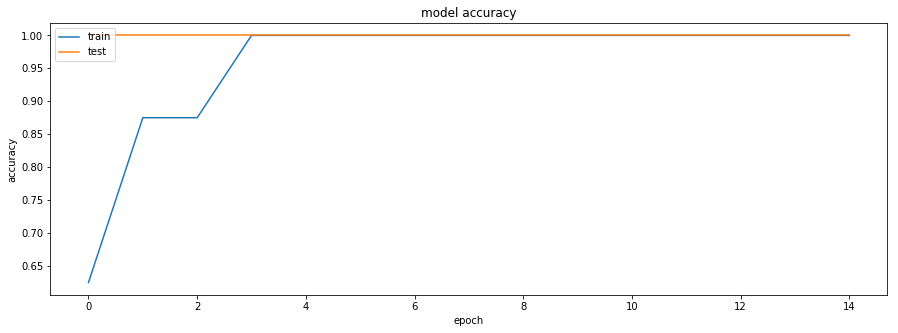

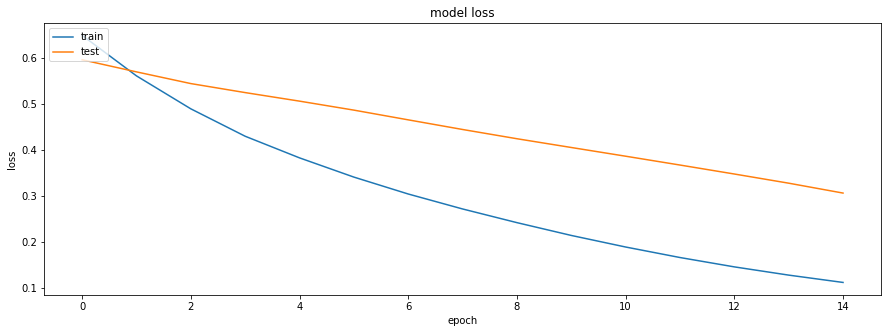

In [25]:
person = 'kenzo'
    
print(history[person])
plt.figure(figsize=(15, 5))
plt.plot(history[person].history['acc'])
plt.plot(history[person].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15, 5))
plt.plot(history[person].history['loss'])
plt.plot(history[person].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
print(results)

[0.30656206607818604, 1.0, 0.666666567325592]


In [27]:
model[person].predict(model_train['kenzo'].X_test)

array([[0.21838376, 0.7816163 ],
       [0.69299483, 0.30700523]], dtype=float32)

In [28]:
predictions[0].shape

NameError: name 'predictions' is not defined

In [ ]:
np.sum(predictions[0])